<a href="https://colab.research.google.com/github/Moacho78/Parcial-2-VD/blob/main/Parcial_2_Visualizacion_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Cargar los dos archivos CSV
#df1 = pd.read_csv('/content/healthcareTrain.csv')
df2 = pd.read_csv('/content/thyroidDF.csv')

#Filtrar Columnas

In [ ]:
df2

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,M,f,f,f,f,f,f,f,f,...,64.0,t,0.83,t,77.0,f,NaN,SVI,-,870119022
9168,22,M,f,f,f,f,f,f,f,f,...,91.0,t,0.92,t,99.0,f,NaN,SVI,-,870119023
9169,69,M,f,f,f,f,f,f,f,f,...,113.0,t,1.27,t,89.0,f,NaN,SVI,I,870119025
9170,47,F,f,f,f,f,f,f,f,f,...,75.0,t,0.85,t,88.0,f,NaN,other,-,870119027


In [ ]:
# Índices de columnas a excluir (ajustados a base cero)
columnas_a_excluir = [3, 4, 5, 8, 10, 11, 15, 18, 19, 26, 27, 28, 29, 30]

# Filtrar las columnas que no están en la lista de exclusión
df_filtrado = df2.drop(df2.columns[columnas_a_excluir], axis=1)

# Ahora df_filtrado contiene solo las columnas deseadas

In [ ]:
df_filtrado

,age,sex,on_thyroxine,pregnant,thyroid_surgery,query_hypothyroid,goitre,tumor,hypopituitary,TSH_measured,TSH,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
0,29,F,f,f,f,t,f,f,f,t,0.3,f,NaN,f,NaN,f,NaN
1,29,F,f,f,f,f,f,f,f,t,1.6,t,128.0,f,NaN,f,NaN
2,41,F,f,f,f,f,f,f,f,f,NaN,f,NaN,f,NaN,f,NaN
3,36,F,f,f,f,f,f,f,f,f,NaN,f,NaN,f,NaN,f,NaN
4,32,F,f,f,f,f,f,f,f,f,NaN,f,NaN,f,NaN,f,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,M,f,f,f,f,f,f,f,f,NaN,t,64.0,t,0.83,t,77.0
9168,22,M,f,f,f,f,f,f,f,f,NaN,t,91.0,t,0.92,t,99.0
9169,69,M,f,f,f,f,f,f,f,f,NaN,t,113.0,t,1.27,t,89.0
9170,47,F,f,f,f,f,f,f,f,f,NaN,t,75.0,t,0.85,t,88.0


#PREPROCESAMIENTO


In [ ]:
print(df_filtrado.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                9172 non-null   int64  
 1   sex                8865 non-null   object 
 2   on_thyroxine       9172 non-null   object 
 3   pregnant           9172 non-null   object 
 4   thyroid_surgery    9172 non-null   object 
 5   query_hypothyroid  9172 non-null   object 
 6   goitre             9172 non-null   object 
 7   tumor              9172 non-null   object 
 8   hypopituitary      9172 non-null   object 
 9   TSH_measured       9172 non-null   object 
 10  TSH                8330 non-null   float64
 11  TT4_measured       9172 non-null   object 
 12  TT4                8730 non-null   float64
 13  T4U_measured       9172 non-null   object 
 14  T4U                8363 non-null   float64
 15  FTI_measured       9172 non-null   object 
 16  FTI                8370 

In [ ]:
print(df_filtrado.isnull().sum())  # Muestra la cantidad de valores nulos por columna


age                    0
sex                  307
on_thyroxine           0
pregnant               0
thyroid_surgery        0
query_hypothyroid      0
goitre                 0
tumor                  0
hypopituitary          0
TSH_measured           0
TSH                  842
TT4_measured           0
TT4                  442
T4U_measured           0
T4U                  809
FTI_measured           0
FTI                  802
dtype: int64


In [ ]:
print(df_filtrado.duplicated().sum())  # Muestra cuántas filas están duplicadas
df_filtrado.drop_duplicates(inplace=True)  # Elimina duplicados
# Se eliminaron 199 registros duplicados

0


In [ ]:
print(df_filtrado.isnull().sum())  # Muestra la cantidad de valores nulos por columna
df_filtrado = df_filtrado.dropna() #Elimina valores nulos (1520 datos eliminados que representan el 16,55% de los datos)

age                  0
sex                  0
on_thyroxine         0
pregnant             0
thyroid_surgery      0
query_hypothyroid    0
goitre               0
tumor                0
hypopituitary        0
TSH_measured         0
TSH                  0
TT4_measured         0
TT4                  0
T4U_measured         0
T4U                  0
FTI_measured         0
FTI                  0
dtype: int64


In [ ]:
df_filtrado

,age,sex,on_thyroxine,pregnant,thyroid_surgery,query_hypothyroid,goitre,tumor,hypopituitary,TSH_measured,TSH,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
18,63,F,t,f,f,f,f,f,f,t,68.00,t,48.0,t,1.02,t,47.0
19,36,F,f,f,f,t,f,f,f,t,1.50,t,90.0,t,1.06,t,85.0
21,40,F,f,f,f,f,f,f,f,t,1.20,t,104.0,t,1.08,t,96.0
22,40,F,f,f,f,f,f,f,f,t,5.90,t,88.0,t,0.84,t,105.0
23,77,F,f,f,f,f,f,f,f,t,0.05,t,107.0,t,1.13,t,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9153,64,M,f,f,f,f,f,f,f,t,0.81,t,31.0,t,0.55,t,56.0
9154,16,M,f,f,f,f,f,f,f,t,2.60,t,122.0,t,0.86,t,142.0
9155,54,M,f,f,f,f,f,f,f,t,1.10,t,105.0,t,0.82,t,128.0
9156,78,M,f,f,f,f,f,f,f,t,0.97,t,97.0,t,0.73,t,133.0


In [ ]:
df_filtrado.to_csv("df_filtrado.csv", index=False)

#Analisis Exploratorio

In [ ]:
df_filtrado.head()

,age,sex,on_thyroxine,pregnant,thyroid_surgery,query_hypothyroid,goitre,tumor,hypopituitary,TSH_measured,TSH,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
18,63,F,t,f,f,f,f,f,f,t,68.00,t,48.0,t,1.02,t,47.0
19,36,F,f,f,f,t,f,f,f,t,1.50,t,90.0,t,1.06,t,85.0
21,40,F,f,f,f,f,f,f,f,t,1.20,t,104.0,t,1.08,t,96.0
22,40,F,f,f,f,f,f,f,f,t,5.90,t,88.0,t,0.84,t,105.0
23,77,F,f,f,f,f,f,f,f,t,0.05,t,107.0,t,1.13,t,95.0


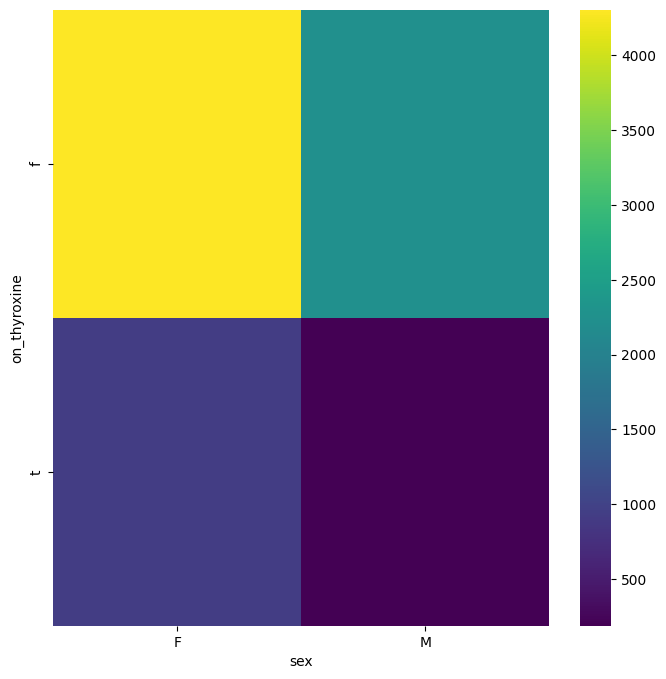

In [ ]:
# @title sex vs on_thyroxine

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['on_thyroxine'].value_counts()
    for x_label, grp in df_filtrado.groupby('sex')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('sex')
_ = plt.ylabel('on_thyroxine')

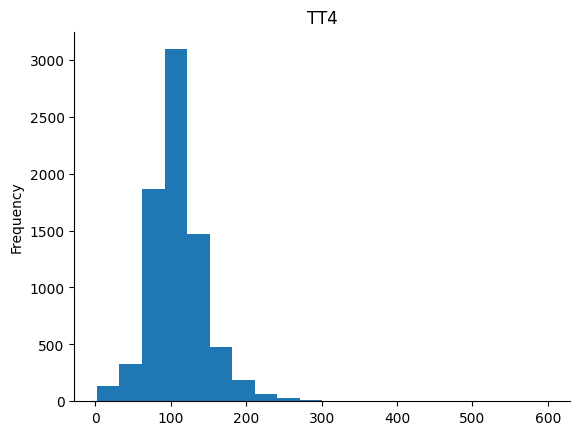

In [ ]:
# @title TT4

from matplotlib import pyplot as plt
df_filtrado['TT4'].plot(kind='hist', bins=20, title='TT4')
plt.gca().spines[['top', 'right',]].set_visible(False)

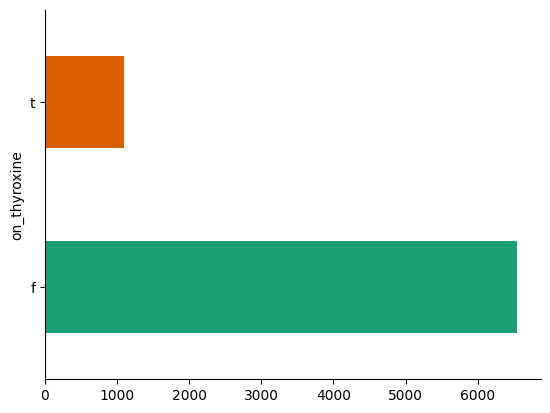

In [ ]:
# @title on_thyroxine

from matplotlib import pyplot as plt
import seaborn as sns
df_filtrado.groupby('on_thyroxine').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

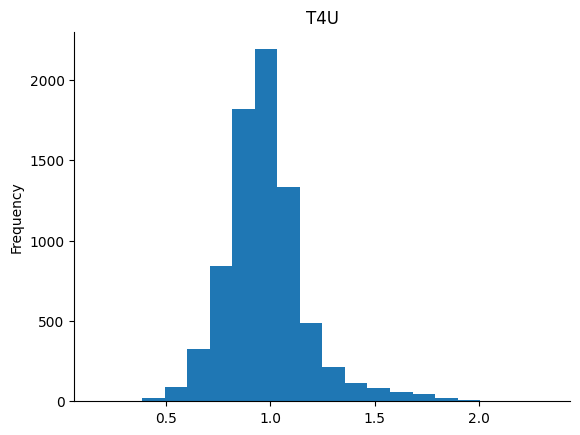

In [ ]:
# @title T4U

from matplotlib import pyplot as plt
df_filtrado['T4U'].plot(kind='hist', bins=20, title='T4U')
plt.gca().spines[['top', 'right',]].set_visible(False)

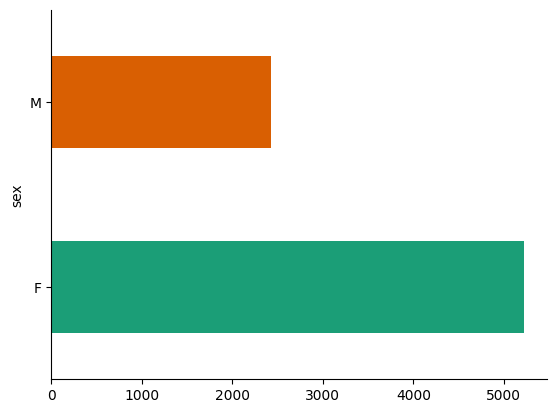

In [ ]:
# @title sex

from matplotlib import pyplot as plt
import seaborn as sns
df_filtrado.groupby('sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)